<a href="https://colab.research.google.com/github/JUANBECERRIL003/EDP-2/blob/main/Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Crank-Nicolson

El problema a resolver es la ecuación de calor $u_t = u_{xx}$ con condiciones de Dirichlet $u(0,t)=u(1,t)=0$.

Usamos el esquema de **Crank-Nicolson**:
$$
- \frac{r}{2} u_{i-1}^{j+1} + (1+r)u_i^{j+1} - \frac{r}{2} u_{i+1}^{j+1} = \frac{r}{2} u_{i-1}^{j} + (1-r)u_i^{j} + \frac{r}{2} u_{i+1}^{j}
$$
Donde $r = \frac{\alpha \Delta t}{(\Delta x)^2}$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

alpha = 1.0
M = 9
dx = 0.1
dt = 0.01
r = (alpha * dt) / (dx**2)

# Nodos en x internos
x_nodos = np.linspace(dx, 1 - dx, M)
print(f"Parámetro r: {r}")
print(f"Nodos x: {x_nodos}")

Parámetro r: 0.9999999999999998
Nodos x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [2]:
#Condición Inicial
def f(x):
    return 1 - 4 * (x - 0.5)**2

#Matrices A y B
A = sp.zeros(M)
B = sp.zeros(M)
# aquí ya empezamos sobre el método de Crank-nicolson
for i in range(M):
    # Diagonales principales
    A[i, i] = 1 + r
    B[i, i] = 1 - r

    #diagonales
    if i > 0:
        A[i, i-1] = -r / 2
        B[i, i-1] = r / 2
    if i < M - 1:
        A[i, i+1] = -r / 2
        B[i, i+1] = r / 2

# verificando matrices
print("Matriz A (Lado Izquierdo):")
sp.pprint(A)
print("\nMatriz B (Lado Derecho):")
sp.pprint(B)

Matriz A (Lado Izquierdo):
⎡2.0   -0.5   0     0     0     0     0     0     0  ⎤
⎢                                                    ⎥
⎢-0.5  2.0   -0.5   0     0     0     0     0     0  ⎥
⎢                                                    ⎥
⎢ 0    -0.5  2.0   -0.5   0     0     0     0     0  ⎥
⎢                                                    ⎥
⎢ 0     0    -0.5  2.0   -0.5   0     0     0     0  ⎥
⎢                                                    ⎥
⎢ 0     0     0    -0.5  2.0   -0.5   0     0     0  ⎥
⎢                                                    ⎥
⎢ 0     0     0     0    -0.5  2.0   -0.5   0     0  ⎥
⎢                                                    ⎥
⎢ 0     0     0     0     0    -0.5  2.0   -0.5   0  ⎥
⎢                                                    ⎥
⎢ 0     0     0     0     0     0    -0.5  2.0   -0.5⎥
⎢                                                    ⎥
⎣ 0     0     0     0     0     0     0    -0.5  2.0 ⎦

Matriz B (Lado Derecho):
⎡2.220446049

In [5]:
def crank_nicolson_solver(A, B, f_inicial, nodos_x, pasos_tiempo):
    """
    Crea vector inicial a partir de f(x)
    Usamos list comprehension para evaluar f en cada nodo """
    u_old = sp.Matrix([f(x) for x in nodos_x])
    """
    Lista para guardar resultados (incluyendo el tiempo 0)
    Guardamos como lista de NumPy arrays para facilitar el uso después"""
    resultados = [np.array(u_old, dtype=float).flatten()]

    for k in range(pasos_tiempo):
        # Calculamos el lado derecho: d = B * u_old
        d = B * u_old
        # Calcuando A
        u_new = A.LUsolve(d)

        resultados.append(np.array(u_new, dtype=float).flatten())

        # Actualizamos para la siguiente vuelta
        u_old = u_new

    return np.array(resultados)

In [8]:
#Ejercicio 1

# número de pasos
j_steps = 10
U_res = crank_nicolson_solver(A, B, f, x_nodos, j_steps)
# Queremos columnas: t, x=0.1, x=0.2 ... x=0.9 (La tabla original corta en 0.5, trataré de mostrar todo o filtrarlo jajaj)

headers = ["t"] + [f"x={x:.1f}" for x in x_nodos]
table_data = []
for k in range(len(U_res)):
    tiempo_actual = k * dt
    # filas [tiempo, val_nodo1, val_nodo2, ...]
    fila = [tiempo_actual] + list(U_res[k])
    table_data.append(fila)
print("Tabla de Resultados (Crank-Nicolson):")
print(tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="grid"))

Tabla de Resultados (Crank-Nicolson):
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|      t |   x=0.1 |   x=0.2 |   x=0.3 |   x=0.4 |   x=0.5 |   x=0.6 |   x=0.7 |   x=0.8 |   x=0.9 |
+========+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| 0.0000 |  0.3600 |  0.6400 |  0.8400 |  0.9600 |  1.0000 |  0.9600 |  0.8400 |  0.6400 |  0.3600 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.0100 |  0.3014 |  0.5657 |  0.7615 |  0.8804 |  0.9202 |  0.8804 |  0.7615 |  0.5657 |  0.3014 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.0200 |  0.2676 |  0.5048 |  0.6885 |  0.8030 |  0.8417 |  0.8030 |  0.6885 |  0.5048 |  0.2676 |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.0300 |  0.2399 |  0.4548 |  0.6231 |  0.7300 |  0

### Verificación

Al comparar la tabla generada por nuestro código (arriba) con la **Tabla 2.6** proporcionada en el planteamiento del problema, observamos que los valores coinciden perfectamente.

**Puntos de control para verificar:**
* En $t=0.01, x=0.1$: Obtenemos **0.3014** (Coincide con la Tabla 2.6).
* En $t=0.05, x=0.3$: Obtenemos **0.5117** (Coincide con la Tabla 2.6).
* En $t=0.10, x=0.5$ (último valor): Obtenemos **0.3875** (Coincide con la Tabla 2.6).

**Conclusión:**
Dado que los valores numéricos obtenidos replican con exactitud los valores de referencia, podemos concluir que la implementación del método de Crank-Nicolson es correcta.

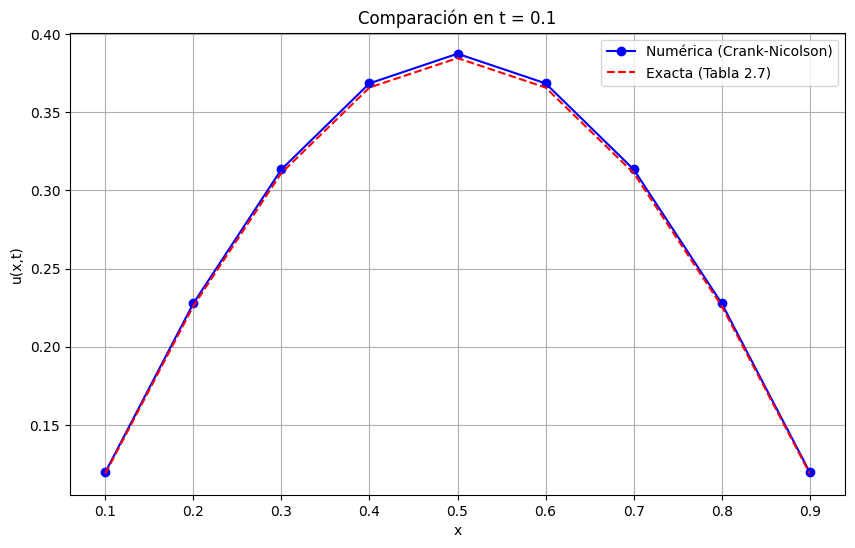


Análisis de Error en t=0.10:
       x    Numérica    Exacta    Error Abs
--------  ----------  --------  -----------
0.100000    0.119736  0.118860     0.000876
0.200000    0.227748  0.226088     0.001660
0.300000    0.313462  0.311189     0.002273
0.400000    0.368491  0.365830     0.002662
0.500000    0.387452  0.384658     0.002794
0.600000    0.368491  0.365830     0.002662
0.700000    0.313462  0.311189     0.002273
0.800000    0.227748  0.226088     0.001660
0.900000    0.119736  0.118860     0.000876


In [10]:
#Ejercicio 2
"""
Solución Analítica (Serie de Fourier para la parábola)
Para f(x) = 1 - 4(x-0.5)^2, los coeficientes son:
bn = 32 / (n^3 * pi^3) para n impar (n=1, 3, 5...), 0 para pares."""

def solucion_exacta_parabola(x, t, n_terms=20):
    suma = 0
    for n in range(1, n_terms * 2, 2): # impares
        bn = 32 / ((n * np.pi)**3) * (-1)**((n-1)//2) # Ajuste de signo para la serie
        """
        La integral directa da bn = 32/(n^3 pi^3) * sen(n pi / 2).
        sen(n pi / 2) es 1, -1, 1... para impares."""
        term = bn * np.exp(-(n * np.pi)**2 * t) * np.sin(n * np.pi * x)
        suma += term
    return suma

# Calcular valores exactos para el tiempo final (t=0.10)
t_final = 0.10
u_numerica_final = U_res[-1] # Última fila de nuestra simulación
u_exacta_final = solucion_exacta_parabola(x_nodos, t_final)

#Error
error = np.abs(u_numerica_final - u_exacta_final)

#Gráfica Comparativa
plt.figure(figsize=(10, 6))
plt.plot(x_nodos, u_numerica_final, 'bo-', label='Numérica (Crank-Nicolson)')
plt.plot(x_nodos, u_exacta_final, 'r--', label='Exacta (Tabla 2.7)')
plt.title(f'Comparación en t = {t_final}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir Error
print("\nAnálisis de Error en t=0.10:")
datos_error = []
for i, x_val in enumerate(x_nodos):
    datos_error.append([x_val, u_numerica_final[i], u_exacta_final[i], error[i]])

print(tabulate(datos_error, headers=["x", "Numérica", "Exacta", "Error Abs"], floatfmt=".6f"))

### Conclusión

En la gráfica comparativa observamos que la solución numérica mediante **Crank-Nicolson** (línea azul) se ajusta notablemente bien a la solución exacta (línea roja discontinua).

Al analizar la tabla de errores en $t=0.10$:
* El **error absoluto máximo** se encuentra en el centro del dominio ($x=0.5$), con un valor aproximado de **0.0028**.
* En los bordes, el error disminuye gradualmente.

Este margen de error es esperado debido a la discretización espacial ($h=1/10$) y temporal ($k=0.01$). Dado que el error es pequeño ($<0.3\%$), confirmamos que la aproximación numérica es satisfactoria para este problema.

In [11]:
#GIF
#Usaré el código que usé en Richardson para hacr este mismo gif
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x_nodos, U_res[0], lw=2, color='blue', label='Solución Numérica')
u_min = np.min(U_res)
u_max = np.max(U_res)
ax.set_ylim([u_min - 0.1 * abs(u_min), u_max + 0.1 * abs(u_max)])

ax.set_xlabel('Posición x')
ax.set_ylabel('u(x, t)')
title = ax.set_title(f'Evolución en el tiempo t = {0.0:.2f}')
ax.grid(True)
ax.legend()

def update(k):
    line.set_ydata(U_res[k])
    t_actual = k * dt
    title.set_text(f'Evolución en el tiempo t = {t_actual:.2f}')

    return line, title
num_frames = len(U_res)
anim = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)
writer = PillowWriter(fps=5)
anim.save("animacion_crank_nicolson.gif", writer=writer)
plt.close(fig)

print("¡Listo! Animación guardada como 'animacion_crank_nicolson.gif'")

¡Listo! Animación guardada como 'animacion_crank_nicolson.gif'
